# libraries, data input and preprocessing


In [812]:
import numpy as np 
import pandas as pd
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
from keras_visualizer import visualizer
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import model_from_json
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import *
from keras.layers import BatchNormalization
import os
from sklearn.metrics import classification_report

In [813]:
data_path = 'dataset/CK+48'
data_dir_list = os.listdir(data_path)

img_data_list=[]
img_class = 0
labels = []
names = []

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    names.append(dataset)
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        labels.append(img_class)
    img_class += 1
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape
num_classes = img_class
Y = utils.to_categorical(labels, num_classes)

Loaded the images of dataset-anger

Loaded the images of dataset-contempt

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-happy

Loaded the images of dataset-sadness

Loaded the images of dataset-surprise



In [814]:
def getLabel(id):
    return names[id]

In [815]:
X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.30, shuffle=True, random_state=42)

X_train = np.reshape(X_train, (X_train.shape[0], 48, 48, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 48, 48, 1))

print(X_train.shape)
print(X_test.shape)

(228, 48, 48, 1)
(99, 48, 48, 1)


# model

In [816]:
input_shape=(48,48,1)

model = Sequential()

model.add(Conv2D(6,(6,6), input_shape=input_shape))
model.add(Conv2D(2,(2,2), input_shape=input_shape))
model.add(Conv2D(4,(2,2), input_shape=input_shape))
model.add(MaxPooling2D())
model.add(Conv2D(4,(2,2), input_shape=input_shape))

model.add(Flatten())
model.add(Dense(7, activation = 'softmax'))

model.summary()

Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_248 (Conv2D)          (None, 43, 43, 6)         222       
_________________________________________________________________
conv2d_249 (Conv2D)          (None, 42, 42, 2)         50        
_________________________________________________________________
conv2d_250 (Conv2D)          (None, 41, 41, 4)         36        
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 20, 20, 4)         0         
_________________________________________________________________
conv2d_251 (Conv2D)          (None, 19, 19, 4)         68        
_________________________________________________________________
flatten_97 (Flatten)         (None, 1444)              0         
_________________________________________________________________
dense_101 (Dense)            (None, 7)              

## compile and fit model

In [817]:
filename='model_train_new.csv'
filepath = os.path.join("./emotion_detector_models_ck+/model_v6_{epoch}.hdf5")

checkpoint = keras.callbacks.ModelCheckpoint(filepath,
                                             monitor='val_acc',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max')

In [818]:
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [819]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'MeanSquaredError'])

In [820]:
model_info = model.fit(X_train, y_train, batch_size=7, epochs=80, validation_data=(X_test, y_test), callbacks=callbacks_list)

Epoch 1/80
33/33 [==============================] - 3s 44ms/step - loss: 1.9185 - accuracy: 0.2719 - mean_squared_error: 0.1199 - val_loss: 1.8675 - val_accuracy: 0.3030 - val_mean_squared_error: 0.1168
Epoch 2/80
33/33 [==============================] - 1s 26ms/step - loss: 1.6708 - accuracy: 0.4167 - mean_squared_error: 0.1080 - val_loss: 1.6457 - val_accuracy: 0.4343 - val_mean_squared_error: 0.1051
Epoch 3/80
33/33 [==============================] - 1s 27ms/step - loss: 1.4456 - accuracy: 0.5482 - mean_squared_error: 0.0931 - val_loss: 1.3869 - val_accuracy: 0.4949 - val_mean_squared_error: 0.0872
Epoch 4/80
33/33 [==============================] - 1s 27ms/step - loss: 1.1005 - accuracy: 0.6579 - mean_squared_error: 0.0713 - val_loss: 1.0378 - val_accuracy: 0.6667 - val_mean_squared_error: 0.0646
Epoch 5/80
33/33 [==============================] - 1s 35ms/step - loss: 0.7467 - accuracy: 0.7719 - mean_squared_error: 0.0500 - val_loss: 0.7190 - val_accuracy: 0.7273 - val_mean_squared

## score and plots

In [821]:
score = model.evaluate(X_train, y_train)
print('Accuracy (train): %.2f' % (score[1]*100))

score = model.evaluate(X_test, y_test)
print('Accuracy (test): %.2f' % (score[1]*100))

8/8 [==============================] - 0s 15ms/step - loss: 1.3247e-04 - accuracy: 1.0000 - mean_squared_error: 3.7675e-08
Accuracy (train): 100.00
4/4 [==============================] - 0s 10ms/step - loss: 1.0374 - accuracy: 0.8384 - mean_squared_error: 0.0393
Accuracy (test): 83.84


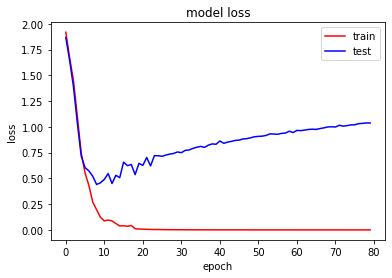

In [822]:
plt.plot(model_info.history['loss'], 'r', label='train')
plt.plot(model_info.history['val_loss'], 'b', label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

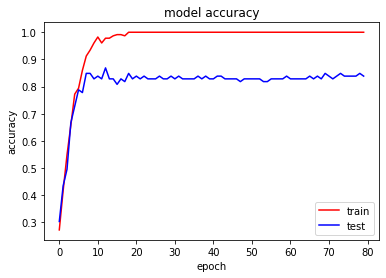

In [823]:
plt.plot(model_info.history['accuracy'], 'r', label='train')
plt.plot(model_info.history['val_accuracy'], 'b', label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [824]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [825]:
y_pred = utils.to_categorical(y_pred, num_classes)

In [826]:
print(classification_report(y_test, y_pred, target_names=names))

              precision    recall  f1-score   support

       anger       0.71      0.86      0.77        14
    contempt       0.80      0.57      0.67         7
     disgust       0.86      0.90      0.88        20
        fear       0.86      0.75      0.80         8
       happy       0.95      1.00      0.97        19
     sadness       0.40      0.29      0.33         7
    surprise       0.92      0.92      0.92        24

   micro avg       0.84      0.84      0.84        99
   macro avg       0.78      0.75      0.76        99
weighted avg       0.83      0.84      0.83        99
 samples avg       0.84      0.84      0.84        99



In [827]:
def title(y_pred, y_test, target_names, i):
    pred_name = names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue: %s' % (pred_name, true_name)

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [828]:
y_pred = [np.where(i == 1)[0][0] for i in y_pred]
y_test = [np.where(i == 1)[0][0] for i in y_test]

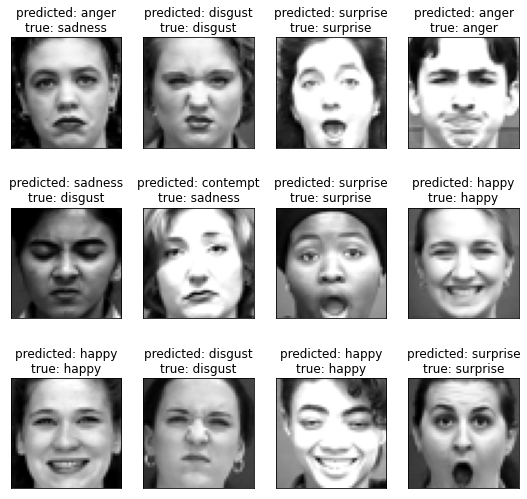

In [829]:
prediction_titles = [title(y_pred, y_test, names, i) for i in range(len(y_pred))]
plot_gallery(X_test, prediction_titles, 48, 48)